## Length Disparity of stop words

Sarang S Balan


In [1]:
import pandas as pd
import os
os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk-20"
import pyterrier as pt
pt.init()
import numpy as np 
import matplotlib.pyplot as plt
import os
import pickle
from pyterrier.index import TerrierIndexer, TerrierStopwords

name_dir=("G:/.shortcut-targets-by-id/1SdID4kNAE5y3MR2PuDXuCC8GfGQkihuW/IRDM")


PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [ ]:
pt.init()

In [2]:
with open('localxmllist.pickle', 'rb') as file:
    # Step 3: Load the data from the pickle file into a variable.
    myxmllist = pickle.load(file)

In [3]:
len(myxmllist)

255780

## Generating list of 20 lists to generate indices from

In [18]:
indexer_w= pt.TRECCollectionIndexer("C:/Users/Sarang/Desktop/noisyir/index_w_stopwords",blocks=True,stopwords=TerrierStopwords("none"),meta={'docno':50,'text': 2048,})
indexer_wo = pt.TRECCollectionIndexer("C:/Users/Sarang/Desktop/noisyir/index_wo_stopwords",blocks=True,stopwords=TerrierStopwords("terrier"),meta={'docno':50,'text': 2048,})

In [20]:
import os

def create_folder_with_variable_subfolder(base_folder, folder_name):
    """
    Creates a folder with a variable-based subfolder name.

    :param base_folder: The base folder path.
    :param folder_name: The name of the variable-based subfolder.
    """
    # Create the full path including the variable-based subfolder
    folder_path = os.path.join(base_folder, folder_name)

    # Check if the folder already exists, and if not, create it
    if not os.path.exists(folder_path):
        try:
            os.makedirs(folder_path)
            print(f"Folder created: {folder_path}")
        except Exception as e:
            print(f"Error creating folder: {str(e)}")
    else:
        print(f"Folder already exists: {folder_path}")

# Example usage:
base_folder_path = 'C:/Users/Sarang/Desktop/noisyir/index_w_stopwords'
variable_name = str(num)  # Replace this with your desired variable name
create_folder_with_variable_subfolder(base_folder_path, variable_name)


Folder created: C:/Users/Sarang/Desktop/noisyir/index_w_stopwords\54833


In [16]:
del indexer_w

In [31]:
import random

my_dictionary = {
    'num':[],
    'terms_wo': [],
    'postings_wo': [],
    'tokens_wo': [],
    'documents_wo': [],
    'terms_w': [],
    'postings_w': [],
    'tokens_w': [],
    'documents_w': []
}
# Generate a list of 20 random numbers between 1 and 255780
random_numbers = [random.randint(1, 255780) for _ in range(20)]

for num in random_numbers:

    start_num = num
    end_num = num + 3
    my_list = myxmllist[start_num:end_num]

    my_dictionary['num'].append(start_num)
    
    ##GENERATING WITHOUT STOPWORDS
    base_folder_path = 'C:/Users/Sarang/Desktop/noisyir/index_wo_stopwords'
    variable_name = str(num)  # Replace this with your desired variable name
    create_folder_with_variable_subfolder(base_folder_path, variable_name)
    indexer_wo = pt.TRECCollectionIndexer("C:/Users/Sarang/Desktop/noisyir/index_wo_stopwords/" + str(num),blocks=True,stopwords=TerrierStopwords("terrier"),meta={'docno':50,'text': 2048,})
    
    indexref = indexer_wo.index(my_list)
    index= pt.IndexFactory.of(indexref)
    print(index.getCollectionStatistics())

    posts = index.getCollectionStatistics().numberOfPostings
    tokens = index.getCollectionStatistics().numberOfTokens
    docs = index.getCollectionStatistics().numberOfDocuments
    terms = index.getCollectionStatistics().numberOfUniqueTerms
    
    # Append a value to the 'terms' list within the dictionary
    my_dictionary['terms_wo'].append(terms)
    # Append a value to the 'postings' list within the dictionary
    my_dictionary['postings_wo'].append(posts)
    # Append a value to the 'tokens' list within the dictionary
    my_dictionary['tokens_wo'].append(tokens)
    # Append a value to the 'documents' list within the dictionary
    my_dictionary['documents_wo'].append(docs)

    
    ##GENERATING WITH STOPWORDS
    base_folder_path = 'C:/Users/Sarang/Desktop/noisyir/index_w_stopwords'
    variable_name = str(num)  # Replace this with your desired variable name
    create_folder_with_variable_subfolder(base_folder_path, variable_name)
    indexer_w = pt.TRECCollectionIndexer("C:/Users/Sarang/Desktop/noisyir/index_w_stopwords/" + str(num),blocks=True,stopwords=TerrierStopwords("none"),meta={'docno':50,'text': 2048,})
    
    indexref = indexer_w.index(my_list)
    index= pt.IndexFactory.of(indexref)
    print(index.getCollectionStatistics())

    posts = index.getCollectionStatistics().numberOfPostings
    tokens = index.getCollectionStatistics().numberOfTokens
    docs = index.getCollectionStatistics().numberOfDocuments
    terms = index.getCollectionStatistics().numberOfUniqueTerms
    
    # Append a value to the 'terms' list within the dictionary
    my_dictionary['terms_w'].append(terms)
    # Append a value to the 'postings' list within the dictionary
    my_dictionary['postings_w'].append(posts)
    # Append a value to the 'tokens' list within the dictionary
    my_dictionary['tokens_w'].append(tokens)
    # Append a value to the 'documents' list within the dictionary
    my_dictionary['documents_w'].append(docs)
    

Folder created: C:/Users/Sarang/Desktop/noisyir/index_wo_stopwords\4467
Number of documents: 104
Number of terms: 1284
Number of postings: 8606
Number of fields: 0
Number of tokens: 14312
Field names: []
Positions:   true

Folder created: C:/Users/Sarang/Desktop/noisyir/index_w_stopwords\4467
Number of documents: 104
Number of terms: 1492
Number of postings: 15594
Number of fields: 0
Number of tokens: 38605
Field names: []
Positions:   true

Folder created: C:/Users/Sarang/Desktop/noisyir/index_wo_stopwords\106405
Number of documents: 190
Number of terms: 2280
Number of postings: 17444
Number of fields: 0
Number of tokens: 27725
Field names: []
Positions:   true

Folder created: C:/Users/Sarang/Desktop/noisyir/index_w_stopwords\106405
Number of documents: 190
Number of terms: 2503
Number of postings: 28632
Number of fields: 0
Number of tokens: 71724
Field names: []
Positions:   true

Folder created: C:/Users/Sarang/Desktop/noisyir/index_wo_stopwords\171490
Number of documents: 225
Numb

In [32]:
my_dictionary

{'num': [4467,
  106405,
  171490,
  237359,
  57275,
  185917,
  15295,
  199816,
  126881,
  246608,
  107872,
  111656,
  39591,
  62998,
  204814,
  150330,
  195117,
  38223,
  161625,
  248256],
 'terms_wo': [1284,
  2280,
  2734,
  323,
  2676,
  1740,
  1463,
  2047,
  1332,
  226,
  1483,
  1652,
  1700,
  2386,
  2047,
  800,
  1316,
  1408,
  1705,
  1767],
 'postings_wo': [8606,
  17444,
  21691,
  955,
  15382,
  11354,
  8437,
  12312,
  8398,
  607,
  9973,
  10589,
  12722,
  17075,
  14421,
  2547,
  8395,
  10615,
  12169,
  12452],
 'tokens_wo': [14312,
  27725,
  35210,
  1257,
  19982,
  17085,
  12540,
  18096,
  11972,
  732,
  15862,
  15560,
  20721,
  26138,
  20170,
  3363,
  13135,
  16718,
  18860,
  18685],
 'documents_wo': [104,
  190,
  225,
  19,
  145,
  122,
  84,
  137,
  85,
  9,
  119,
  114,
  126,
  162,
  154,
  27,
  99,
  119,
  128,
  169],
 'terms_w': [1492,
  2503,
  2956,
  335,
  2909,
  1956,
  1669,
  2264,
  1506,
  235,
  1689,
  1854

In [33]:
index.getCollectionStatistics().numberOfDocuments

169

## Data analysis

In [35]:
df = pd.DataFrame(my_dictionary)


In [38]:
df = df.drop(columns='num')
df

,terms_wo,postings_wo,tokens_wo,documents_wo,terms_w,postings_w,tokens_w,documents_w
0,1284,8606,14312,104,1492,15594,38605,104
1,2280,17444,27725,190,2503,28632,71724,190
2,2734,21691,35210,225,2956,34826,87901,225
3,323,955,1257,19,335,1012,1327,19
4,2676,15382,19982,145,2909,23417,41125,145
5,1740,11354,17085,122,1956,18857,46691,122
6,1463,8437,12540,84,1669,14021,31786,84
7,2047,12312,18096,137,2264,19925,43771,137
8,1332,8398,11972,85,1506,13234,29822,85
9,226,607,732,9,235,645,787,9


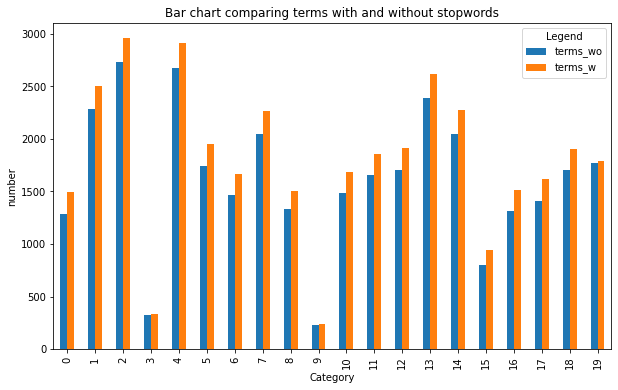

In [42]:

# Create a stacked bar chart
ax = df[['terms_wo', 'terms_w']].plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar chart comparing terms with and without stopwords')

# Add a legend
plt.legend(title='Legend', labels=['terms_wo', 'terms_w', 'postings_wo', 'postings_w', 'tokens_wo', 'tokens_w'])
plt.ylabel('number')
# Show the chart
plt.show()

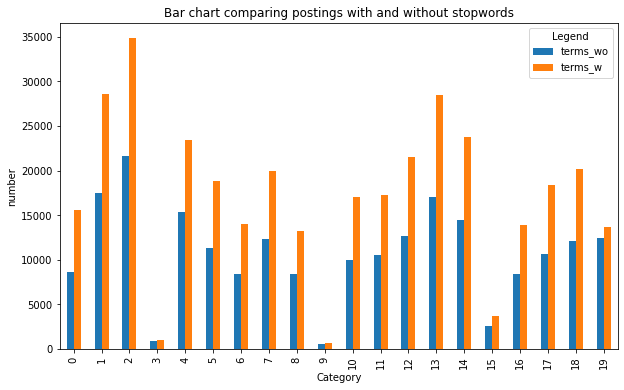

In [43]:

# Create a stacked bar chart
ax = df[['postings_wo', 'postings_w']].plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar chart comparing postings with and without stopwords')

# Add a legend
plt.legend(title='Legend', labels=['terms_wo', 'terms_w', 'postings_wo', 'postings_w', 'tokens_wo', 'tokens_w'])
plt.ylabel('number')
# Show the chart
plt.show()

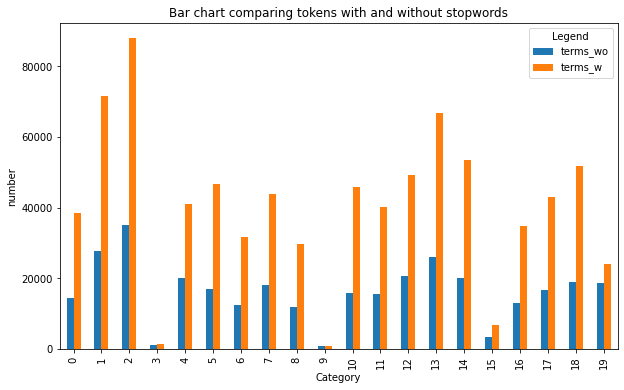

In [44]:



# Create a stacked bar chart
ax = df[['tokens_wo', 'tokens_w']].plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar chart comparing tokens with and without stopwords')

# Add a legend
plt.legend(title='Legend', labels=['terms_wo', 'terms_w', 'postings_wo', 'postings_w', 'tokens_wo', 'tokens_w'])
plt.ylabel('number')
# Show the chart
plt.show()